In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import xgboost as xgb
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from itertools import combinations
from scipy import stats
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import math

In [6]:
#import test and train datasets

In [7]:
df_train = pd.read_csv('/Users/lakshikajain/Documents/GitHub/DataScienceCapstone_2/output.csv')
df_test = pd.read_csv('/Users/lakshikajain/Documents/GitHub/DataScienceCapstone_2/Testing.csv')

In [8]:
#dropped Fluid_overload as all rows for this field is 0

In [9]:
df_train.drop('fluid_overload', axis = 1, inplace = True)

In [10]:
df_train_2 = df_train.loc[:, df_train.columns != "prognosis"]

In [11]:
df_train_2 = df_train_2.apply(pd.to_numeric, errors = 'coerce')

In [12]:
df_train = pd.concat([df_train_2,df_train['prognosis']], axis=1, join='inner')

In [13]:
# Fit the model

In [14]:
X = df_train.drop('prognosis', axis = 1)
y = df_train['prognosis'].values
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 2.50132708,  2.29336913,  6.6749948 , -0.2173802 , -0.14981285,
        -0.43999471, -0.40183714, -0.2173802 , -0.2173802 , -0.14981285,
        -0.14981285, -0.79795147, -0.21428571, -0.14981285, -0.80410593,
        -0.15401412, -0.15401412, -0.15401412, -0.22043899, -0.31960998,
        -0.22043899, -0.31960998, -0.14981285, -0.15401412, -0.35982855,
        -0.61870779, -0.14981285, -0.31728716, -0.39978778, -0.14981285,
        -0.2173802 , -0.54728837, -0.47701668, -0.36198685, -0.55105045,
        -0.55293081, -0.15811388, -0.22043899, -0.22043899, -0.51520103,
        -0.35982855, -0.27844132, -0.15401412, -0.44590404, -0.15401412,
        -0.15401412, -0.27589035, -0.40795783, -0.27332236, -0.27844132,
        -0.15811388, -0.15811388, -0.15811388, -0.15811388, -0.15811388,
        -0.40592207, -0.14981285, -0.2234636 , -0.15401412, -0.15401412,
        -0.15401412, -0.15401412, -0.22043899, -0.27073683, -0.15401412,
        -0.15401412, -0.22043899, -0.15401412, -0.1

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.01, random_state = 0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4870, 131) (4870,)
(50, 131) (50,)


In [16]:
#K Nearest Neighbor

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Separate features and target
X = df_train.drop(columns=['prognosis'])
y = df_train['prognosis']

# Encode the target variable if it's categorical
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=le.classes_)

accuracy, classification_rep


(1.0,
 '                                         precision    recall  f1-score   support\n\n(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        18\n                                   AIDS       1.00      1.00      1.00        30\n                                   Acne       1.00      1.00      1.00        24\n                    Alcoholic hepatitis       1.00      1.00      1.00        25\n                                Allergy       1.00      1.00      1.00        24\n                              Arthritis       1.00      1.00      1.00        23\n                       Bronchial Asthma       1.00      1.00      1.00        33\n                   Cervical spondylosis       1.00      1.00      1.00        23\n                            Chicken pox       1.00      1.00      1.00        21\n                    Chronic cholestasis       1.00      1.00      1.00        15\n                            Common Cold       1.00      1.00      1.00        23\n      

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Initialize the classifiers
log_reg = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(random_state=42)
gbc = GradientBoostingClassifier(random_state=42)

# Dictionary to store models and their predictions
models = {
    "Logistic Regression": log_reg,
    "Random Forest": rf,
    "Gradient Boosting Classifier": gbc
}

# Dictionary to store accuracy and classification reports
results = {}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy and classification report
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred, target_names=le.classes_)
    
    # Store the results
    results[model_name] = {
        "Accuracy": accuracy,
        "Classification Report": classification_rep
    }
results


{'Logistic Regression': {'Accuracy': 1.0,
  'Classification Report': '                                         precision    recall  f1-score   support\n\n(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        18\n                                   AIDS       1.00      1.00      1.00        30\n                                   Acne       1.00      1.00      1.00        24\n                    Alcoholic hepatitis       1.00      1.00      1.00        25\n                                Allergy       1.00      1.00      1.00        24\n                              Arthritis       1.00      1.00      1.00        23\n                       Bronchial Asthma       1.00      1.00      1.00        33\n                   Cervical spondylosis       1.00      1.00      1.00        23\n                            Chicken pox       1.00      1.00      1.00        21\n                    Chronic cholestasis       1.00      1.00      1.00        15\n                          

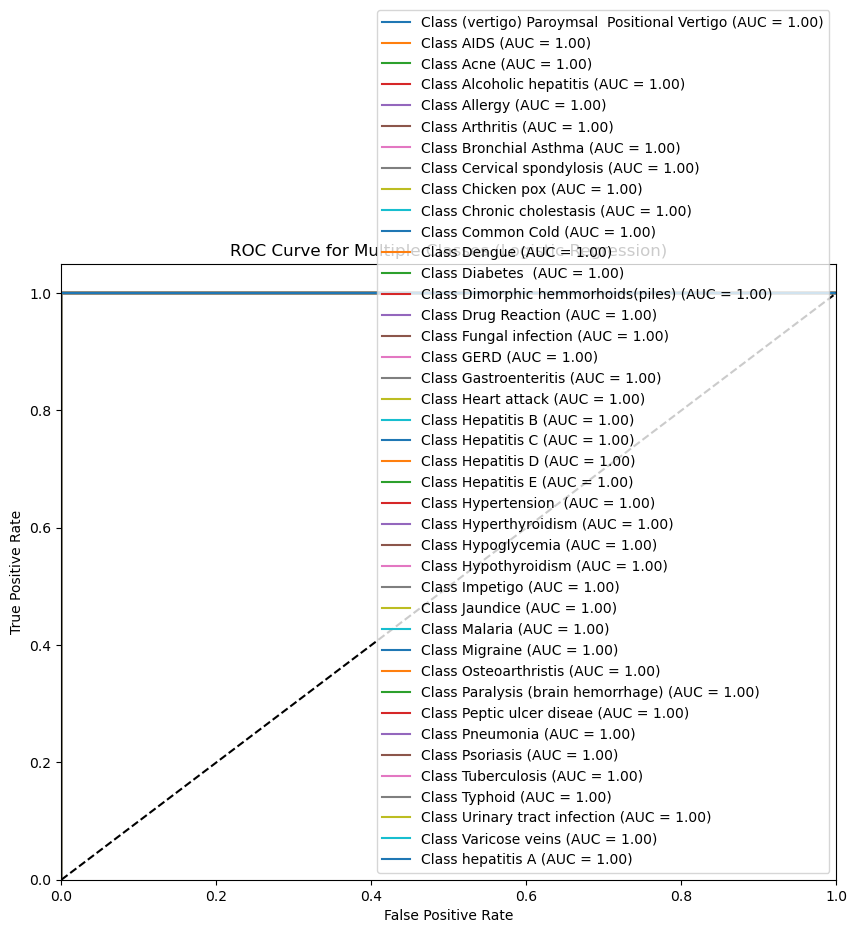

In [19]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get probability estimates for the Logistic Regression model
y_prob = rf.predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(len(le.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(len(le.classes_)):
    plt.plot(fpr[i], tpr[i], label=f"Class {le.classes_[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multiple Classes (Logistic Regression)")
plt.legend(loc="lower right")
plt.show()


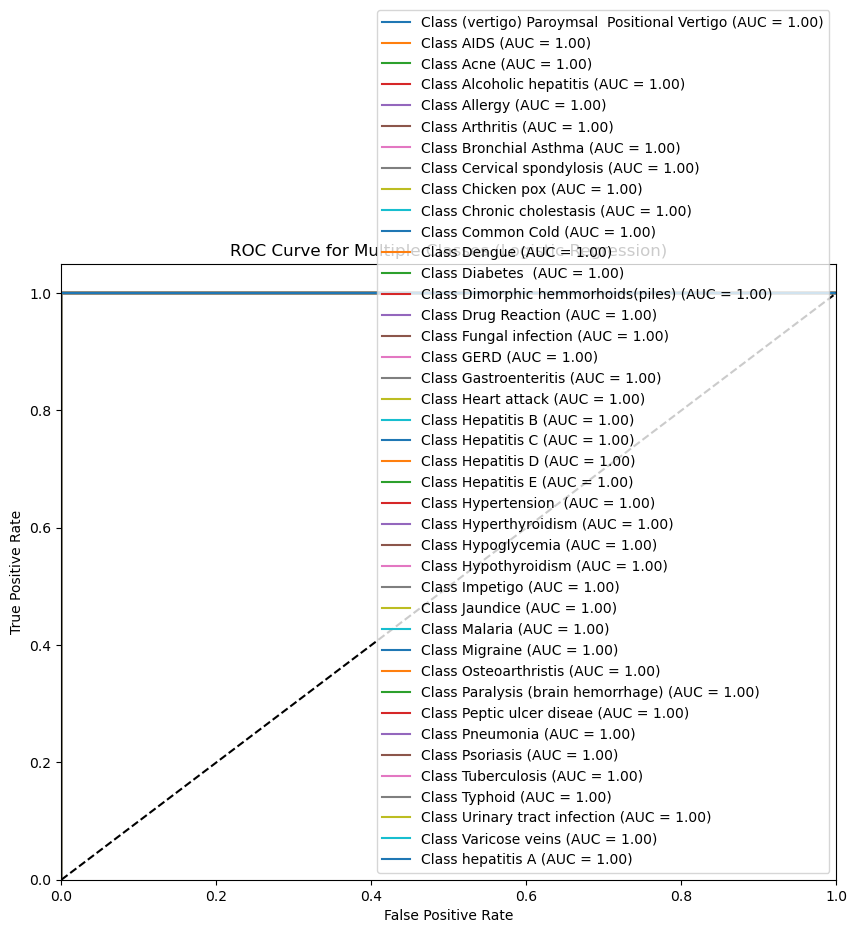

In [20]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get probability estimates for the Logistic Regression model
y_prob = log_reg.predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(len(le.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(len(le.classes_)):
    plt.plot(fpr[i], tpr[i], label=f"Class {le.classes_[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multiple Classes (Logistic Regression)")
plt.legend(loc="lower right")
plt.show()


In [21]:
df_test.drop('fluid_overload', axis = 1, inplace = True)

In [22]:
# Separate features and target from the test dataset
X_test_new = df_test.drop(columns=['prognosis'])
y_test_new = df_test['prognosis']

# Encode the target variable for the new test set
y_test_new_encoded = le.transform(y_test_new)

# Make predictions using the previously trained models
log_reg_pred = log_reg.predict(X_test_new)
rf_pred = rf_best.predict(X_test_new)
knn_pred = knn_best.predict(X_test_new)

# Evaluate the models' performance on the new test data
log_reg_accuracy = accuracy_score(y_test_new_encoded, log_reg_pred)
rf_accuracy = accuracy_score(y_test_new_encoded, rf_pred)
knn_accuracy = accuracy_score(y_test_new_encoded, knn_pred)

# Display the results
log_reg_accuracy, rf_accuracy, knn_accuracy


NameError: name 'rf_best' is not defined

In [ ]:
# Using untuned models for Random Forest and KNN since the tuned ones were interrupted

# Initialize the Random Forest and KNN models again
rf = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)

# Train the models on the original training data
rf.fit(X_train, y_train)
knn.fit(X_train, y_train)

# Make predictions using the untuned models
rf_pred = rf.predict(X_test_new)
knn_pred = knn.predict(X_test_new)

# Evaluate the models' performance on the new test data
rf_accuracy = accuracy_score(y_test_new_encoded, rf_pred)
knn_accuracy = accuracy_score(y_test_new_encoded, knn_pred)

# Display the results
log_reg_accuracy, rf_accuracy, knn_accuracy



In [ ]:
# Redefining the logistic regression accuracy to include it in the output
log_reg_accuracy = accuracy_score(y_test_new_encoded, log_reg_pred)

# Display the results
log_reg_accuracy, rf_accuracy, knn_accuracy
